<h2>🔍 <b>Cumulative Rating Analysis</b></h2>

<p>The following Python code reads a CSV file named <b>data/Dataset_Pertama.csv</b> and calculates the cumulative total of ratings categorized as:</p>
<ul>
    <li><b>Poor Rating (1-2)</b></li>
    <li><b>Good Rating (4-5)</b></li>
</ul>
<p>The calculation results will be displayed as output for quick reference.</p>


In [ ]:
import pandas as pd

df = pd.read_csv('data/Dataset_Pertama.csv')  

# Count cumulative totals
cumulative_total_1 = (df['Rating'] == 1).sum()
cumulative_total_2 = (df['Rating'] == 2).sum()

print(f"Cumulative total of 1s(Bad Rating): {cumulative_total_1}")
print(f"Cumulative total of 2s(Good Rating): {cumulative_total_2}")

Cumulative total of 1s(Bad Rating (1-2)): 518415
Cumulative total of 2s(Good Rating (4-5)): 530161


<h2>🚀 <b>Step 1: Import Libraries</b></h2>

<p>In this step, we will import the necessary libraries for data analysis and visualization. The libraries used include:</p>

<ul>
    <li><b>Pandas:</b> For data manipulation in tabular form.</li>
    <li><b>Numpy:</b> For numerical computation and vector/matrix operations.</li>
    <li><b>Seaborn:</b> For data visualization with more attractive graphics.</li>
    <li><b>Matplotlib:</b> For creating basic plots and charts.</li>
    <li><b>Joblib:</b> For saving and loading machine learning models.</li>
    <li><b>Scikit-learn:</b> For data preprocessing, clustering, and model evaluation.</li>
</ul>

<h3>🔧 <b>Visualization Configuration</b></h3>
<p>Data visualization will be configured using <b>Seaborn</b> with the <code>whitegrid</code> theme, as well as image size settings using <b>Matplotlib</b> for better readability.</p>


In [11]:
# Tahap 1: Impor Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA

# Konfigurasi visualisasi
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

<h2>📂 <b>Step 2: Loading the Dataset</b></h2>

<p>In this step, we will load the dataset from a CSV file using the <b>Pandas</b> library. The loading process is designed to be robust by handling potential errors.</p>

<h3>📝 <b>Steps</b></h3>
<ol>
    <li><b>Define File Path:</b> Use the <code>file_path</code> variable to store the location of the dataset file.</li>
    <li><b>Read the Dataset:</b> Use the <code>pd.read_csv()</code> function with the <code>ISO-8859-1</code> encoding to handle special characters.</li>
    <li><b>Error Handling:</b> Use a <code>try-except</code> block to anticipate errors during file loading.</li>
    <li><b>Display Dataset Information:</b> Use <code>data.info()</code> and <code>data.describe()</code> to provide an initial overview of the dataset's structure and statistics.</li>
</ol>


In [ ]:
# Tahap 2: Memuat Dataset
file_path = 'data/Dataset_Kedua.csv'
try:
    data = pd.read_csv(file_path, encoding='ISO-8859-1')
    print('Dataset berhasil dimuat!')
    print(data.info())
    print(data.describe())
except Exception as e:
    print(f'Error dalam memuat dataset: {e}')


Dataset berhasil dimuat!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Custo

<h2>🔍 <b>Step 3: Exploratory Data Analysis (EDA)</b></h2>

<p>In this step, we will perform <b>Exploratory Data Analysis (EDA)</b> to understand the data structure and identify patterns or anomalies. EDA will include analyzing missing values, descriptive statistics, correlations between variables, and data visualization using histograms and boxplots.</p>

<h3>📊 <b>EDA Steps</b></h3>
<ol>
    <li><b>Missing Values Analysis:</b> Calculate the number of missing values in each column and display them as a bar plot.</li>
    <li><b>Descriptive Statistics:</b> Compute descriptive statistics for all numerical columns.</li>
    <li><b>Correlation Matrix:</b> Display correlations between numerical variables in the form of a heatmap.</li>
    <li><b>Data Visualization:</b> Create histograms and boxplots to understand the distribution of data in each numerical column.</li>
</ol>


Missing Data per Kolom:
Product Description              180519
Order Zipcode                    155679
Customer Lname                        8
Customer Zipcode                      3
Type                                  0
Order Profit Per Order                0
Order Item Cardprod Id                0
Order Item Discount                   0
Order Item Discount Rate              0
Order Item Id                         0
Order Item Product Price              0
Order Item Profit Ratio               0
Order Item Quantity                   0
Sales                                 0
Order Item Total                      0
Order Region                          0
order date (DateOrders)               0
Order State                           0
Order Status                          0
Product Card Id                       0
Product Category Id                   0
Product Image                         0
Product Name                          0
Product Price                         0
Product Status  

C:\Users\winst\AppData\Local\Temp\ipykernel_4176\1973165464.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.index[:20], y=missing_data.values[:20], palette='viridis')


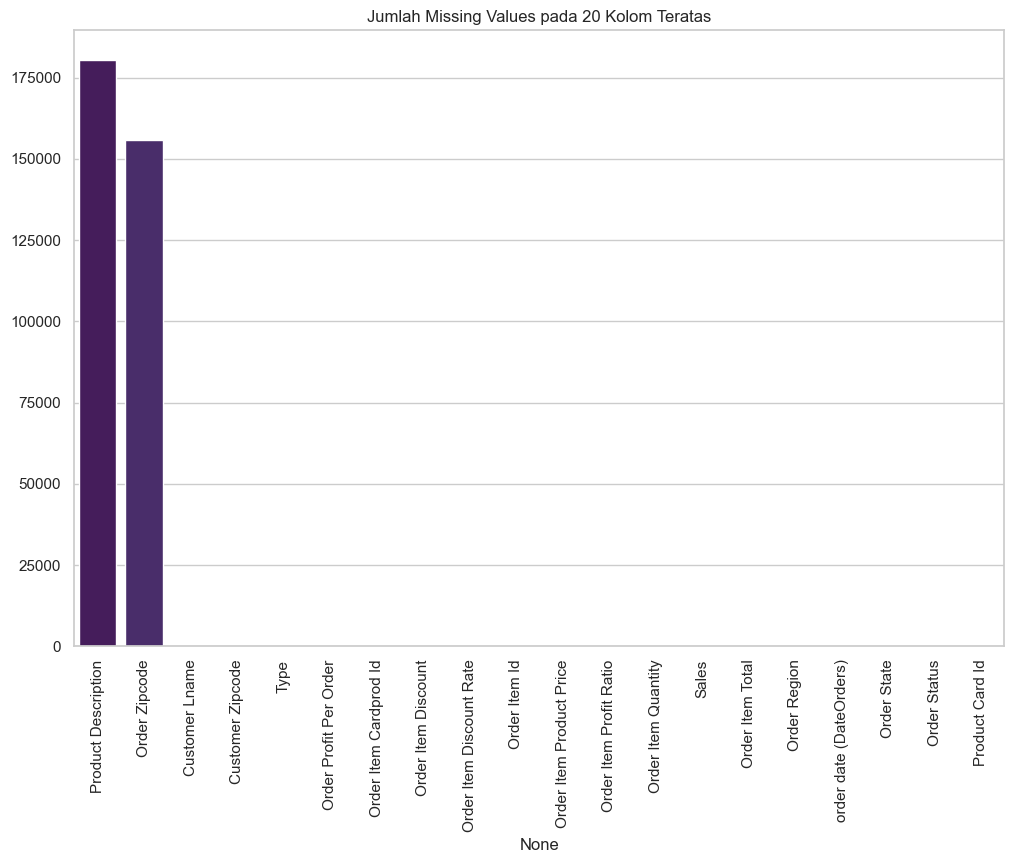

Statistik Deskriptif:
                                  count          mean           std  \
Days for shipping (real)       180519.0      3.497654      1.623722   
Days for shipment (scheduled)  180519.0      2.931847      1.374449   
Benefit per order              180519.0     21.974989    104.433526   
Sales per customer             180519.0    183.107609    120.043670   
Late_delivery_risk             180519.0      0.548291      0.497664   
Category Id                    180519.0     31.851451     15.640064   
Customer Id                    180519.0   6691.379495   4162.918106   
Customer Zipcode               180516.0  35921.126914  37542.461122   
Department Id                  180519.0      5.443460      1.629246   
Latitude                       180519.0     29.719955      9.813646   
Longitude                      180519.0    -84.915675     21.433241   
Order Customer Id              180519.0   6691.379495   4162.918106   
Order Id                       180519.0  36221.894903  

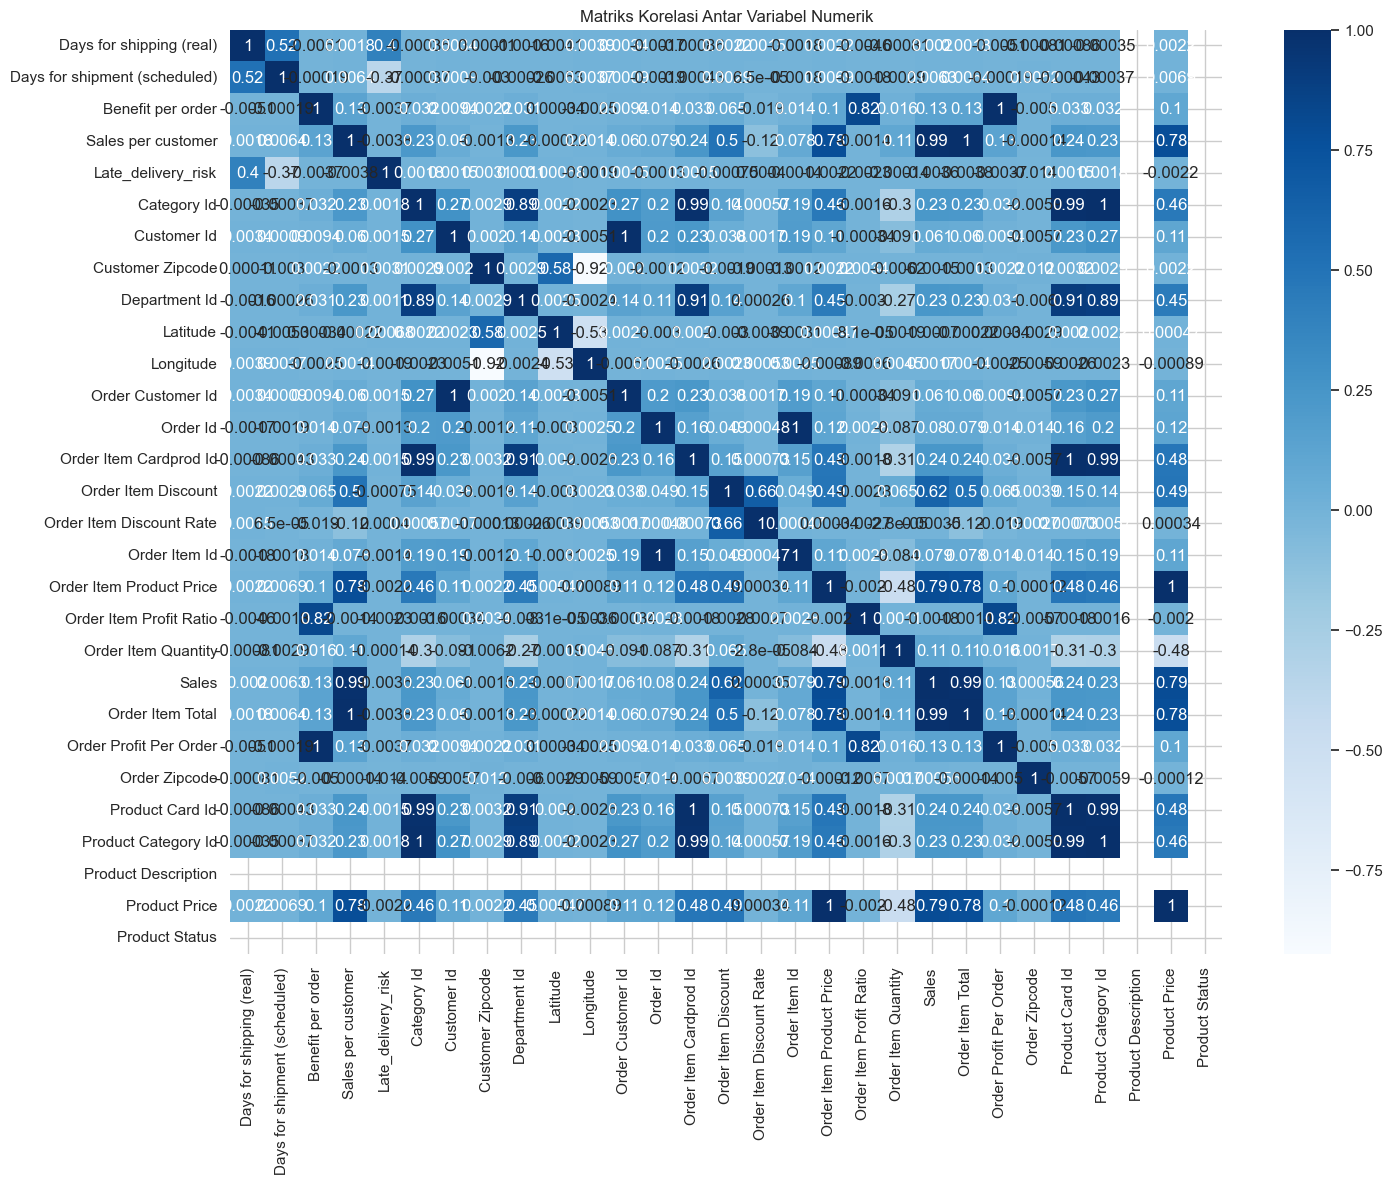

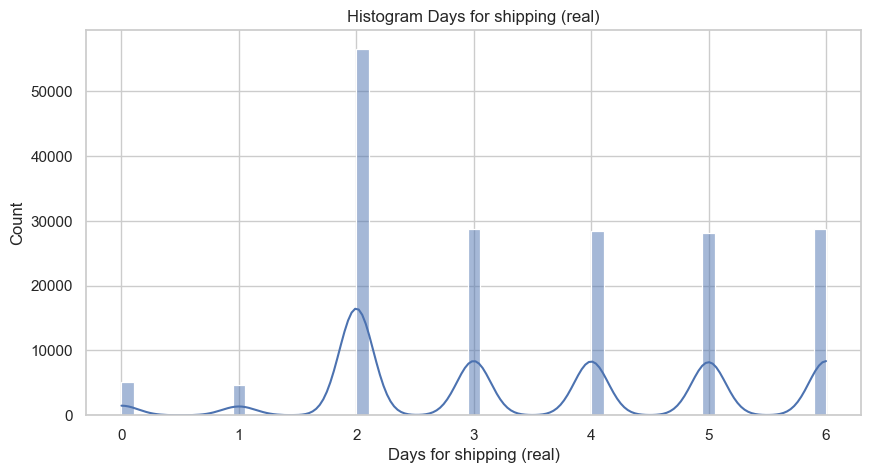

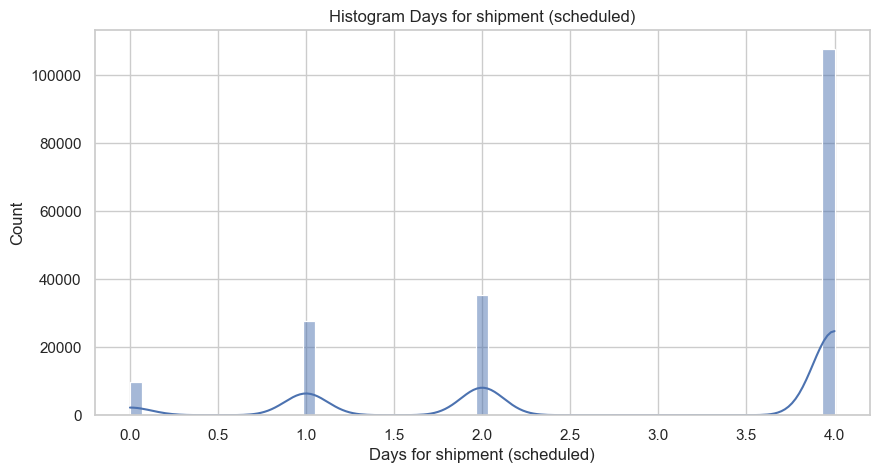

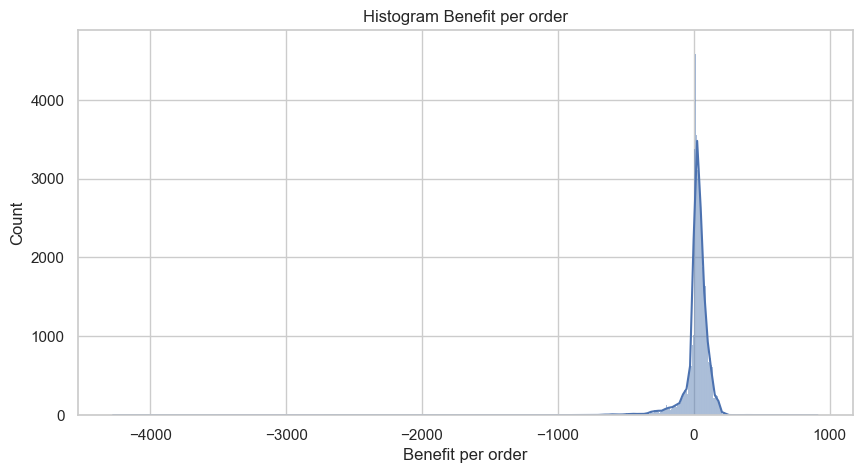

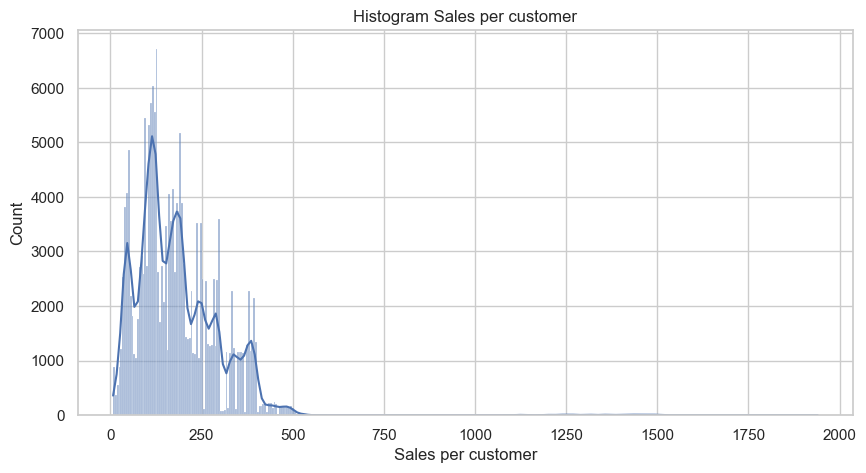

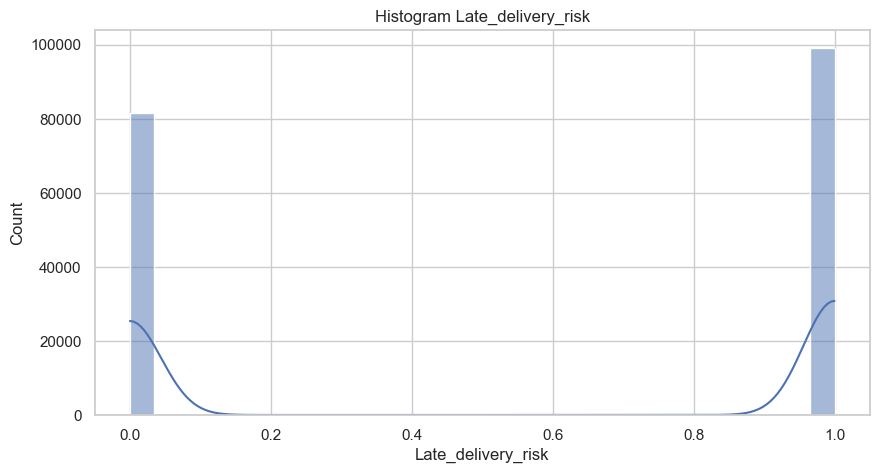

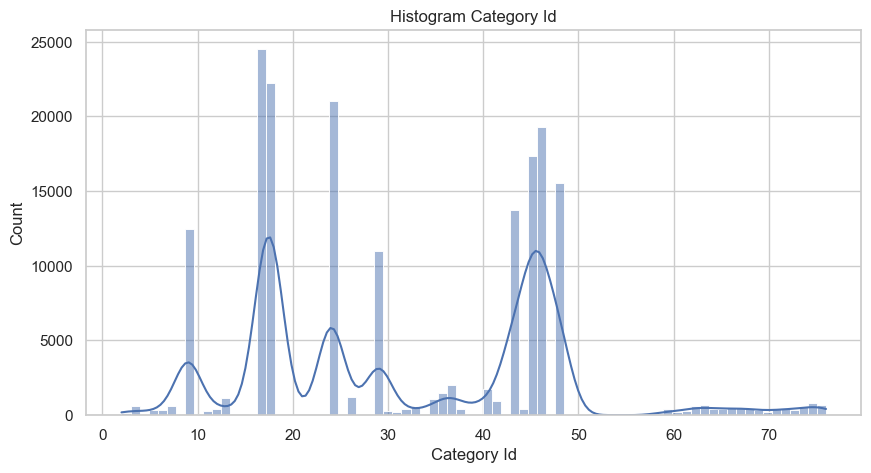

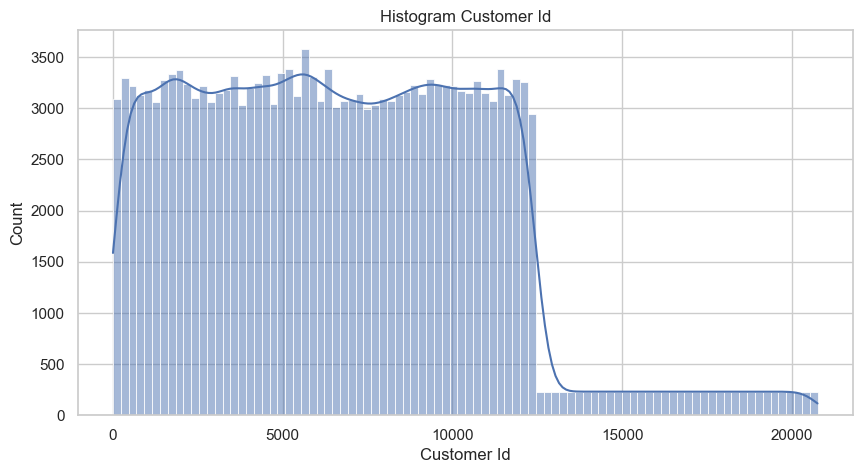

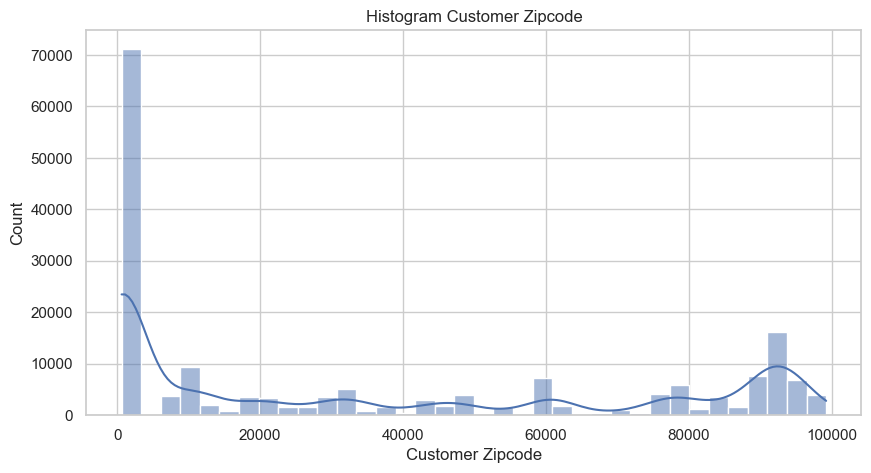

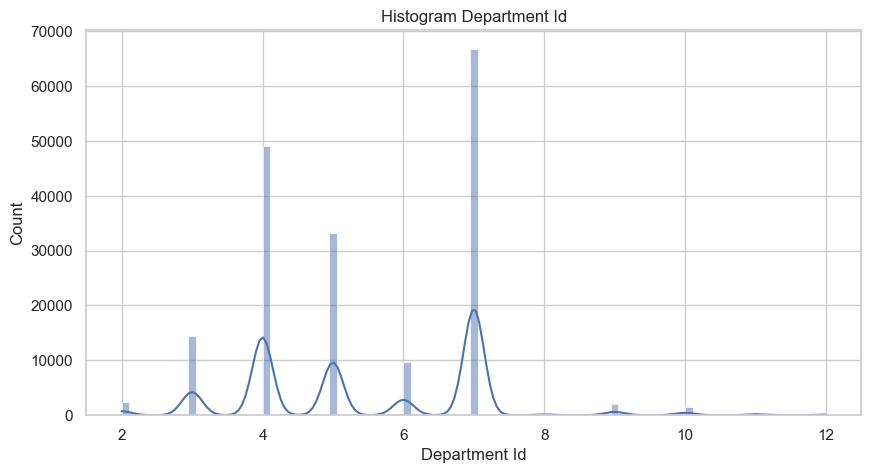

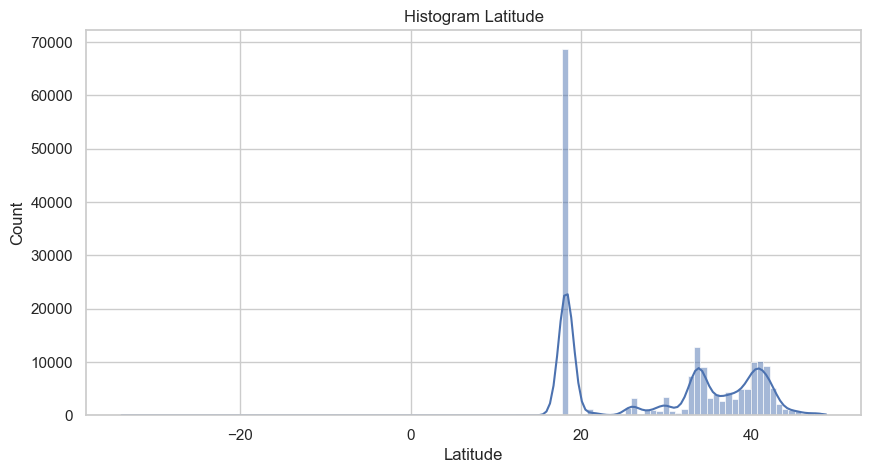

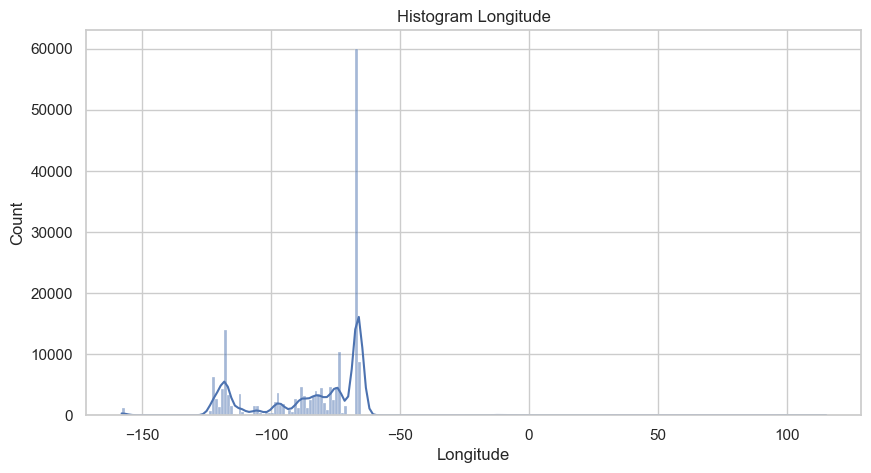

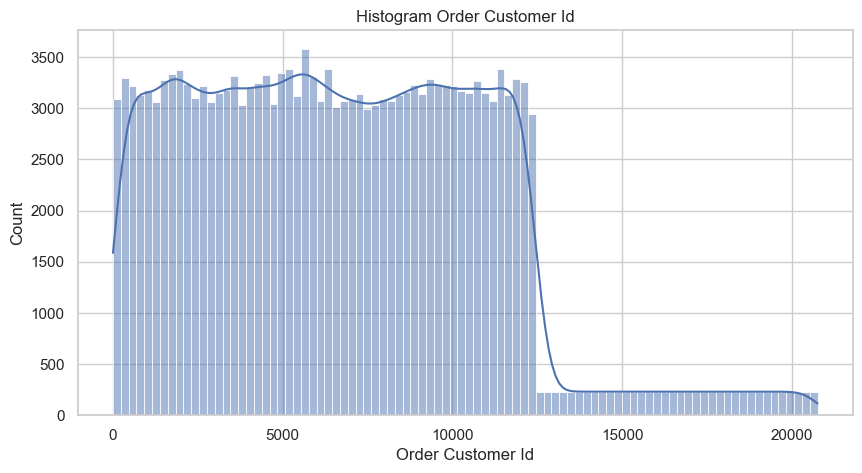

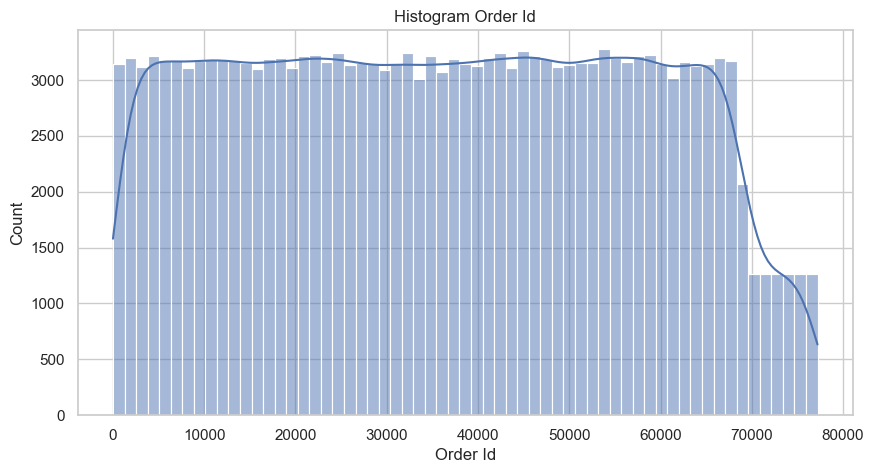

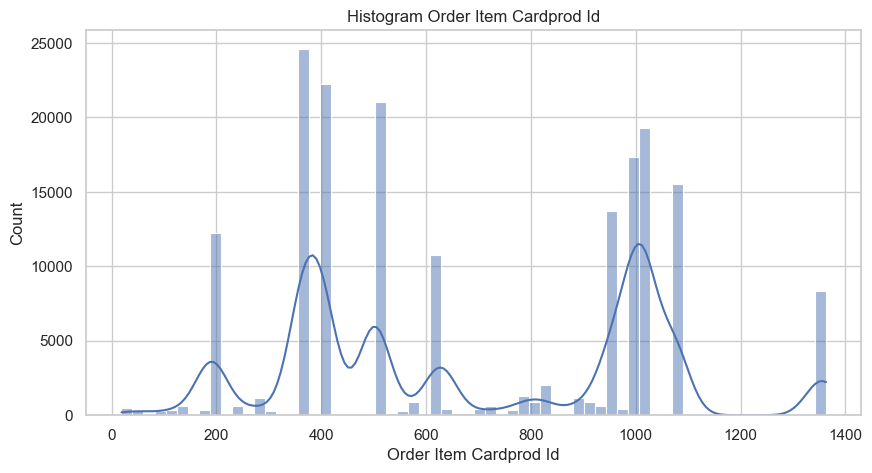

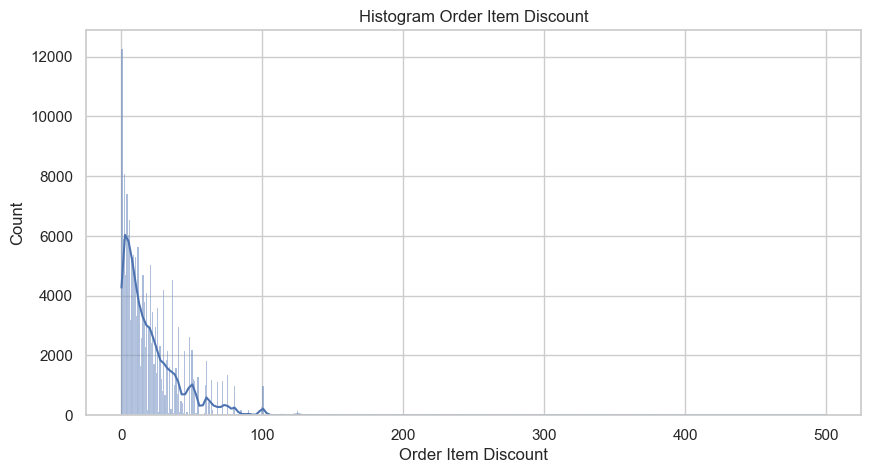

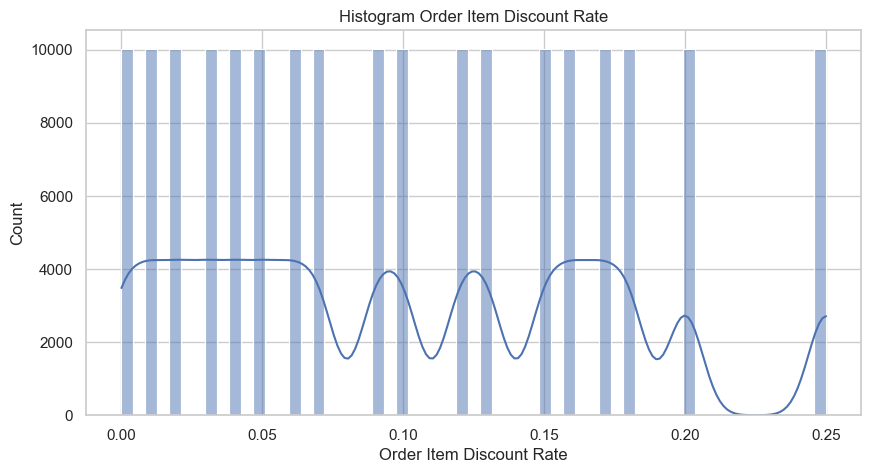

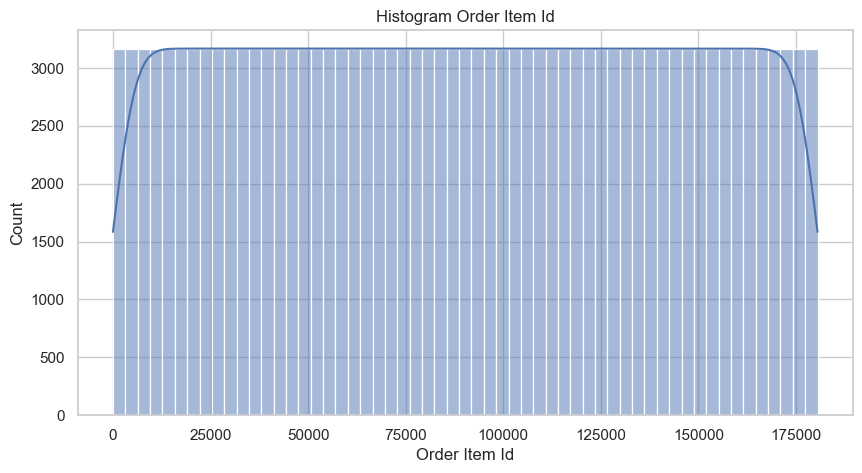

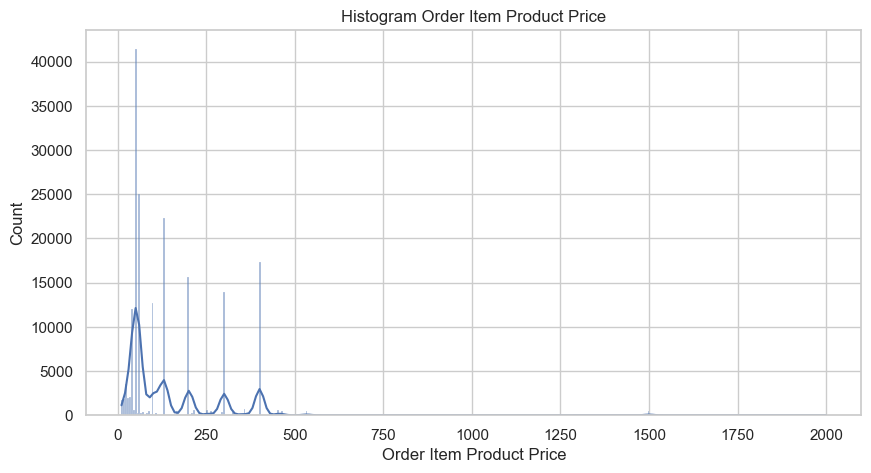

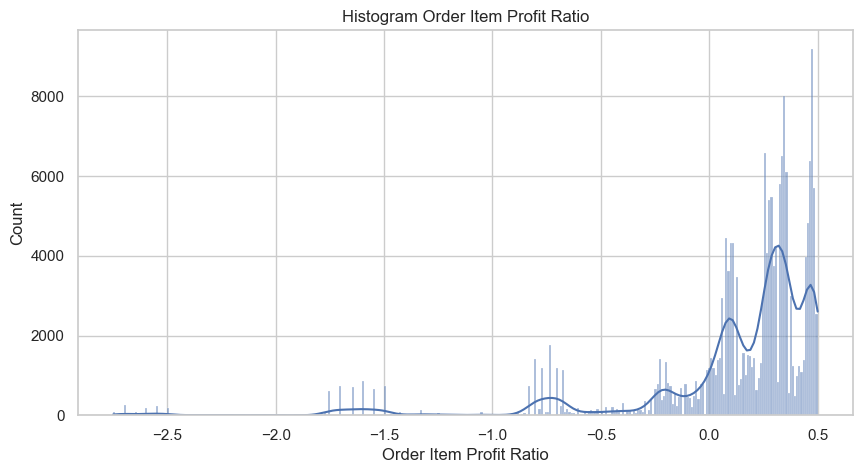

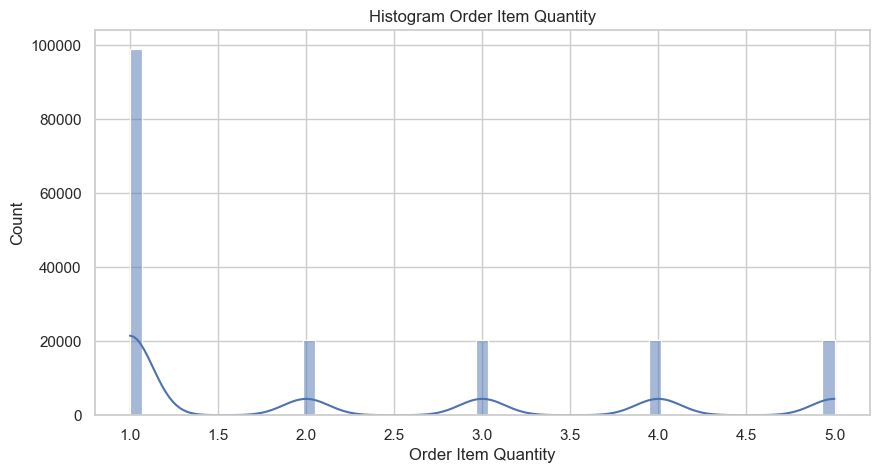

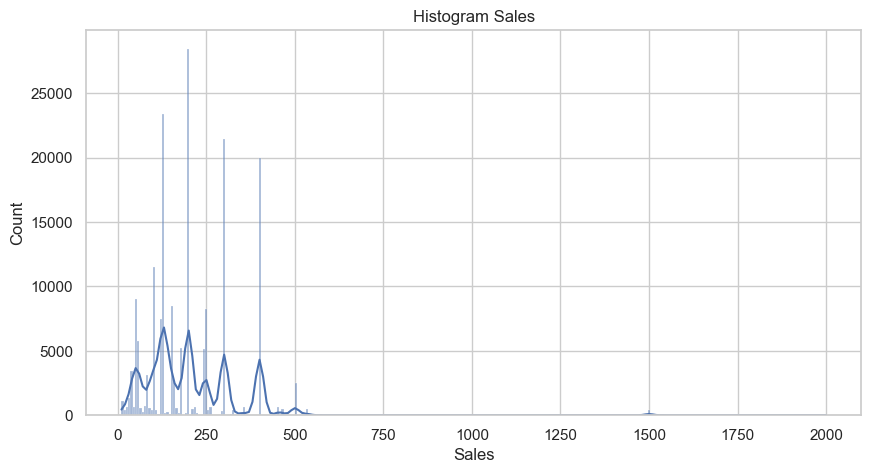

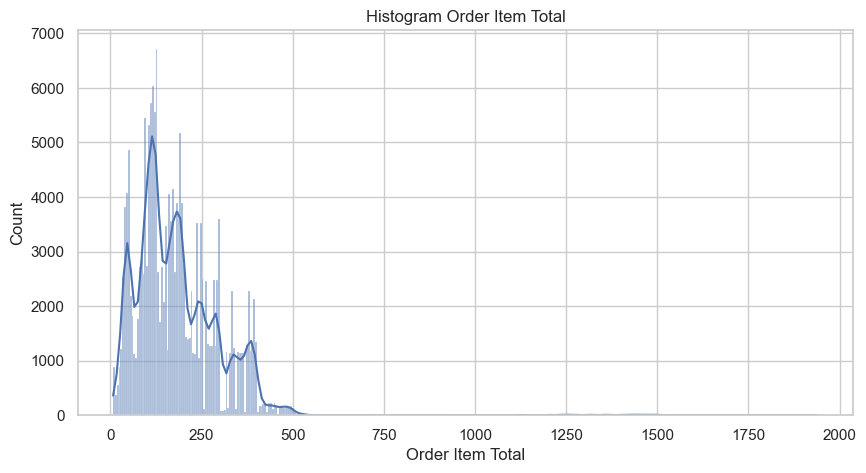

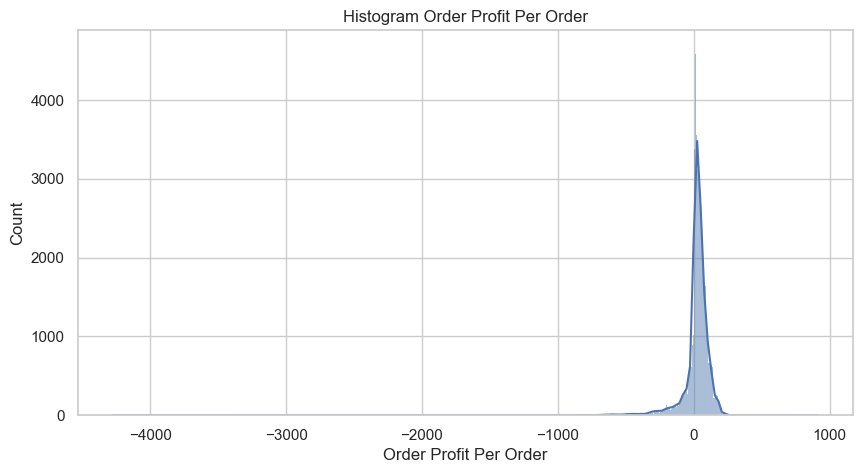

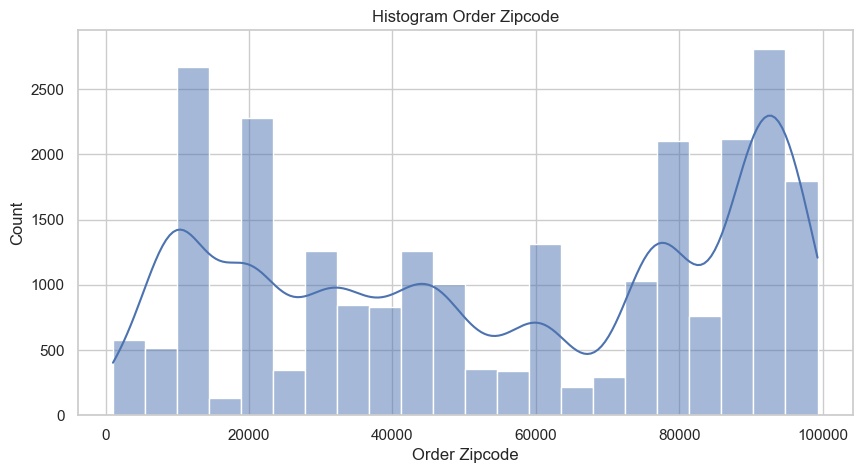

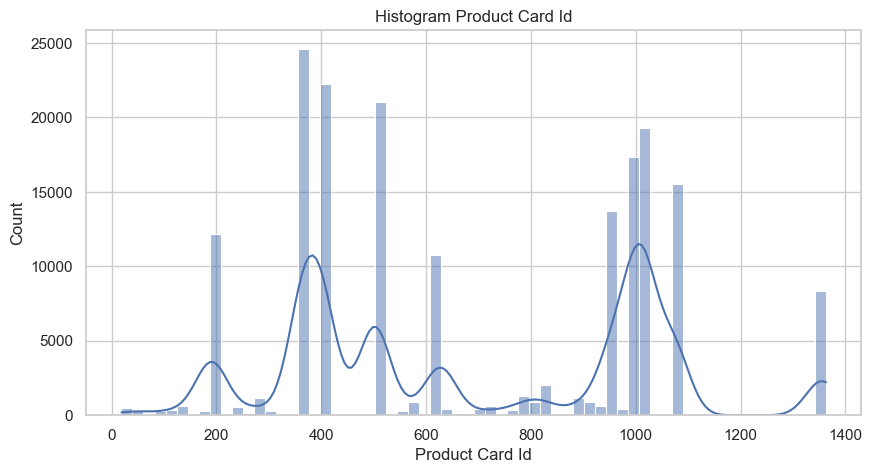

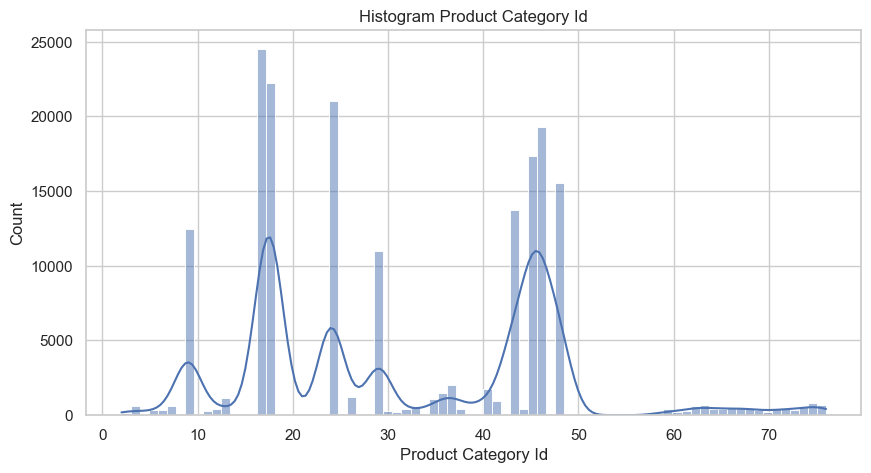

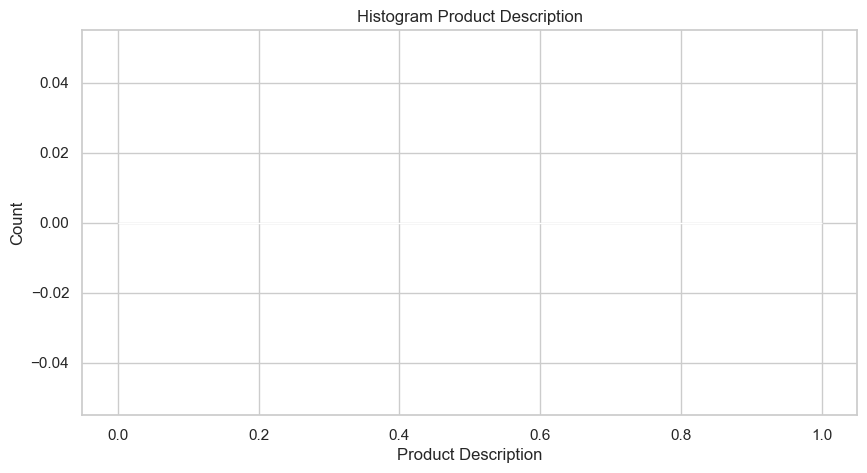

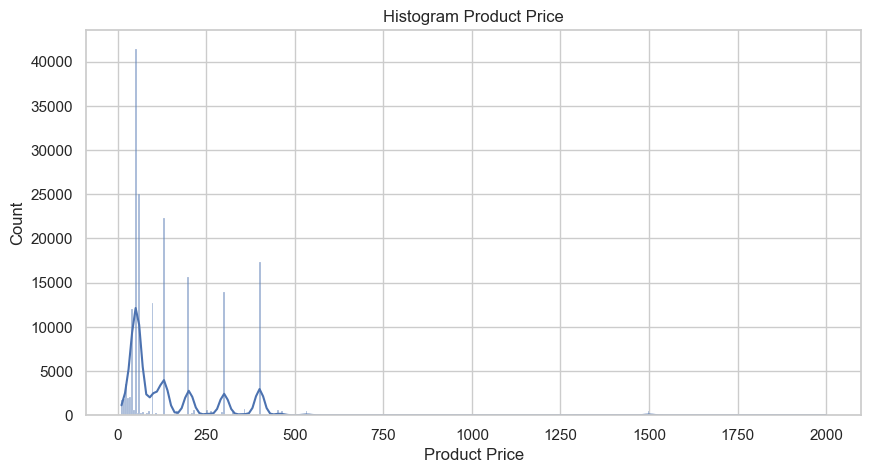

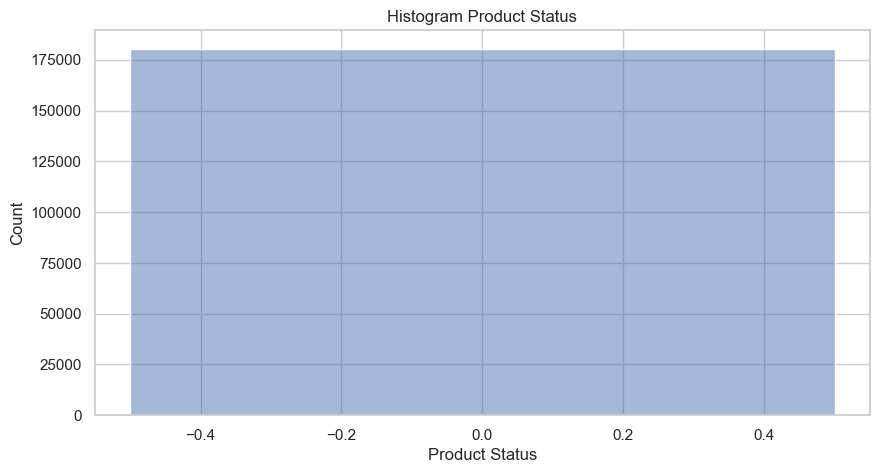

In [13]:
# Tahap 3: Exploratory Data Analysis (EDA)
missing_data = data.isnull().sum().sort_values(ascending=False)
print('Missing Data per Kolom:')
print(missing_data)

# Visualisasi Missing Values
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_data.index[:20], y=missing_data.values[:20], palette='viridis')
plt.title('Jumlah Missing Values pada 20 Kolom Teratas')
plt.xticks(rotation=90)
plt.show()

# Statistik Deskriptif untuk Kolom Numerik
print('Statistik Deskriptif:')
print(data.describe().T)

# Pilih hanya kolom numerik
numeric_data = data.select_dtypes(include=['number'])

# Matriks Korelasi
plt.figure(figsize=(16, 12))
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, cmap='Blues', annot=True)
plt.title('Matriks Korelasi Antar Variabel Numerik')
plt.show()

# Visualisasi Data: Histogram dan Boxplot
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram {col}')
    plt.show()

<h2>🔧 <b>Step 4: Data Preprocessing</b></h2>

<p>In this step, the data will be processed to make it more suitable for analysis and modeling. Data preprocessing includes removing irrelevant columns, handling missing values, encoding categorical columns, and standardizing numerical features.</p>

<h3>📝 <b>Preprocessing Steps</b></h3>
<ol>
    <li><b>Removing Irrelevant Columns:</b> Drop unnecessary columns such as personal information and redundant data.</li>
    <li><b>Handling Missing Values:</b> Fill missing values in numerical columns with the mean.</li>
    <li><b>Encoding Categorical Columns:</b> Convert categorical data into numerical form using Label Encoding.</li>
    <li><b>Standardizing Numerical Features:</b> Standardize numerical columns to ensure they are on the same scale.</li>
</ol>


In [14]:
# Tahap 4: Data Preprocessing
# Menghapus kolom yang tidak relevan dan kolom kosong penuh
drop_columns = ['Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Password', 'Product Description', 'Order Zipcode']
data.drop(columns=drop_columns, inplace=True)

# Mengisi nilai hilang dengan nilai rata-rata
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].mean(), inplace=True)

# Encoding Kolom Kategorikal
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Standarisasi Fitur Numerik
scaler = StandardScaler()
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
scaled_data = scaler.fit_transform(data[numeric_cols])

C:\Users\winst\AppData\Local\Temp\ipykernel_4176\3521672856.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


<h2>🔍 <b>Step 5: Clustering Model</b></h2>

<p>In this step, clustering is performed using the <b>K-Means</b> algorithm with the number of clusters set to 3. The K-Means algorithm will group the data into clusters based on feature similarity after standardization.</p>

<h2>📊 <b>Step 6: Model Evaluation</b></h2>

<p>Model evaluation is carried out by calculating two key metrics:</p>
<ol>
    <li><b>Davies-Bouldin Index:</b> Measures the average similarity between clusters. The lower the value, the better the clustering quality.</li>
    <li><b>Calinski-Harabasz Index:</b> Measures the ratio between inter-cluster variance and intra-cluster variance. The higher the value, the better the clustering quality.</li>
</ol>


In [ ]:
# Tahap 5: Model Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
data['Cluster'] = clusters

# Tahap 6: Evaluasi Model
db_score = davies_bouldin_score(scaled_data, clusters)
ch_score = calinski_harabasz_score(scaled_data, clusters)
print(f'Davies-Bouldin Index: {db_score}')
print(f'Calinski-Harabasz Index: {ch_score}')

Davies-Bouldin Index: 2.390884599438019
Calinski-Harabasz Index: 28501.095428733115


<h2>📝 <b>Step 7: Cluster Analysis</b></h2>

<p>In this step, an analysis of each formed cluster is performed. The analysis aims to understand the unique characteristics of each cluster based on the average feature values.</p>


In [71]:
# Tahap 7: Analisis Cluster
cluster_summary = data.groupby('Cluster').mean()
print('Ringkasan Karakteristik Cluster:')
print(cluster_summary)


Ringkasan Karakteristik Cluster:
             Type  Days for shipping (real)  Days for shipment (scheduled)  \
Cluster                                                                      
0        1.677608                  3.492504                       2.930147   
1        1.678791                  3.496686                       2.933282   
2        1.666776                  3.505585                       2.931957   

         Benefit per order  Sales per customer  Delivery Status  \
Cluster                                                           
0                18.249849          150.505730         1.166887   
1                29.728706          246.024569         1.171086   
2                15.635295          134.683328         1.169655   

         Late_delivery_risk  Category Id  Category Name  Customer City  ...  \
Cluster                                                                 ...   
0                  0.547396    19.773964      26.956972     141.084862  ...   
1  

<h2>📊 <b>Step 8: Clustering Result Visualization</b></h2>

<p>In this step, clustering results are visualized using <b>Principal Component Analysis (PCA)</b> techniques. This visualization helps to understand the distribution and separation between clusters in a two-dimensional space.</p>


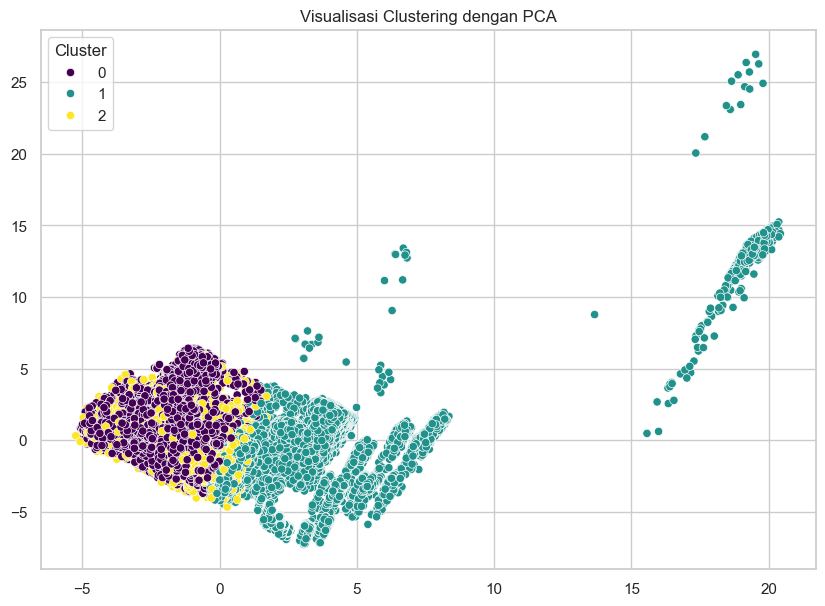

In [72]:
# Tahap 8: Visualisasi Hasil Clustering
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=data['Cluster'], palette='viridis')
plt.title('Visualisasi Clustering dengan PCA')
plt.show()


<h2>💾 <b>Step 9: Saving the Model and Results</b></h2>

<p>In this step, the clustering model that has been created is saved so it can be reused without retraining. Additionally, the clustering results are saved in CSV format for further analysis.</p>


In [73]:
# Tahap 9: Menyimpan Model dan Hasil
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
data.to_csv('hasil_clustering.csv', index=False)
print('Hasil clustering disimpan dalam file hasil_clustering.csv')
print('Model dan scaler disimpan sebagai kmeans_model.pkl dan scaler.pkl')

Hasil clustering disimpan dalam file hasil_clustering.csv
Model dan scaler disimpan sebagai kmeans_model.pkl dan scaler.pkl


<h2>📊 <b>Step 10: Calculating Shipping MAPE</b></h2>

<p>In this step, we calculate the <b>Mean Absolute Percentage Error (MAPE)</b> to assess the accuracy of the shipping time prediction based on actual and predicted data.</p>


In [ ]:
# Tahap 10: Calculating Shipping MAPE

import pandas as pd

def calculate_mape(file_path, actual_col, predicted_col):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Ensure the specified columns exist
    if actual_col not in df.columns or predicted_col not in df.columns:
        raise ValueError(f"Columns '{actual_col}' or '{predicted_col}' not found in the CSV file.")

    # Drop rows where actual values are zero to avoid division errors
    df = df[df[actual_col] != 0]

    # Compute MAPE
    mape = (abs(df[actual_col] - df[predicted_col]) / df[actual_col]).mean() * 100
    
    return mape

# Example usage
file_path = "hasil_clustering.csv"  # Change to your actual CSV file path
actual_col = "Days for shipping (real)"   # Change to your actual column name
predicted_col = "Days for shipment (scheduled)"  # Change to your predicted column name

mape_value = calculate_mape(file_path, actual_col, predicted_col)
print(f"MAPE of Shipping Order: {mape_value:.2f}%")


MAPE of Shipping Orders: 41.99%


<h2>🔗 <b>Step 11: Merging with the First Dataset</b></h2>

<p>In this step, we merge the clustering results with the first dataset and calculate the predicted probability of shipping delay risk along with the <b>Log Loss</b> as the evaluation metric.</p>


In [47]:
# Tahap 11: Menggabungkan dengan Dataset Pertama
import pandas as pd
import numpy as np

def compute_predicted_probability(df, actual_col):
    """Compute the probability of late delivery (percentage of 1s)."""
    late_delivery_prob = df[actual_col].sum() / len(df)
    df["predicted_late_delivery_risk"] = late_delivery_prob
    return df, late_delivery_prob

def calculate_log_loss(y_actual, y_pred_proba):
    """Compute Log Loss."""
    y_pred_proba = np.clip(y_pred_proba, 1e-15, 1 - 1e-15)  # Avoid log(0) errors
    log_loss = -np.mean(y_actual * np.log(y_pred_proba) + (1 - y_actual) * np.log(1 - y_pred_proba))
    return log_loss

# Load dataset
file_path = "hasil_clustering.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)

# Ensure column exists
actual_col = "Late_delivery_risk"
if actual_col not in df.columns:
    raise ValueError(f"Column '{actual_col}' not found in the CSV file.")

# Compute predicted probabilities
df, late_delivery_prob = compute_predicted_probability(df, actual_col)

# Calculate Log Loss
log_loss_value = calculate_log_loss(df[actual_col], df["predicted_late_delivery_risk"])

# Save updated DataFrame (optional)
# df.to_csv("updated_file.csv", index=False)

# Display results
print(df.head())  # Show first few rows
print(f"\nPredicted Late Delivery Probability: {late_delivery_prob:.4f}")
print(f"Log Loss: {log_loss_value:.4f}")

   Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     1                         3                              4   
1     3                         5                              4   
2     0                         4                              4   
3     1                         3                              4   
4     2                         2                              4   

   Benefit per order  Sales per customer  Delivery Status  Late_delivery_risk  \
0          91.250000          314.640015                0                   0   
1        -249.089996          311.359985                1                   1   
2        -247.779999          309.720001                3                   0   
3          22.860001          304.809998                0                   0   
4         134.210007          298.250000                0                   0   

   Category Id  Category Name  Customer City  ...  Product Card Id  \
0           73             40     